In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\PC DOCTOR\Desktop\CODSOFT\advertising.csv',header=0)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [4]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


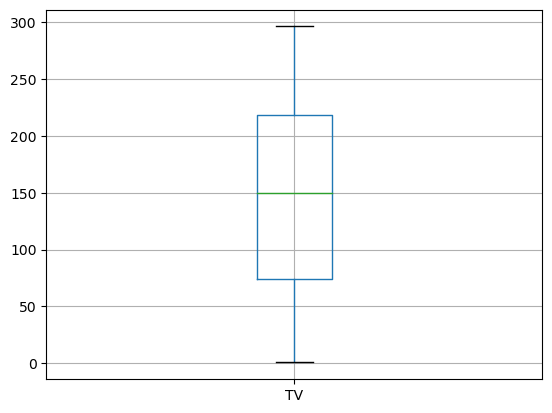

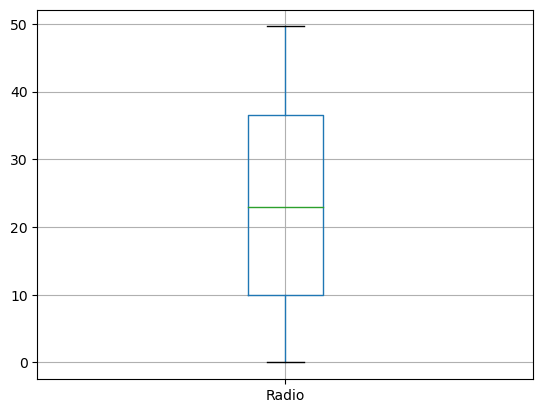

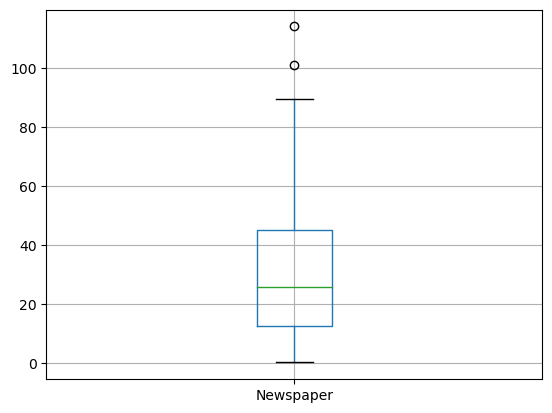

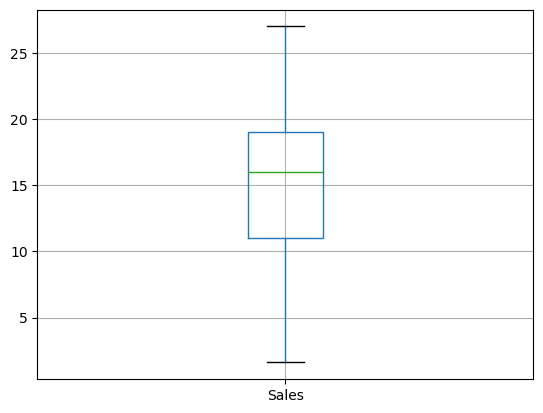

In [6]:
#OUTLIERS
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


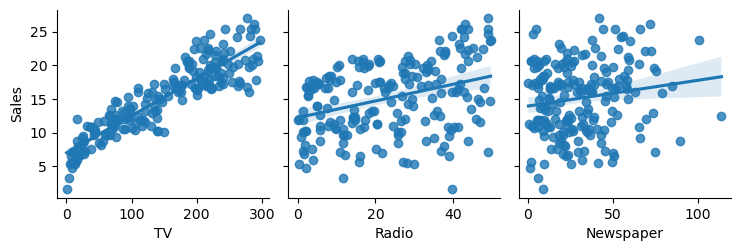

In [9]:
#ASSUMPTION 2 :ASSUMPTION OF LINEARITY :Every independent variable should have a relationship with the dependent var
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],
            y_vars='Sales',kind='reg')
plt.show()

In [11]:
x= data[['TV','Radio','Newspaper']]
y=data['Sales']

C:\Users\PC DOCTOR\AppData\Local\Temp\ipykernel_1644\3496932790.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,hist=True)


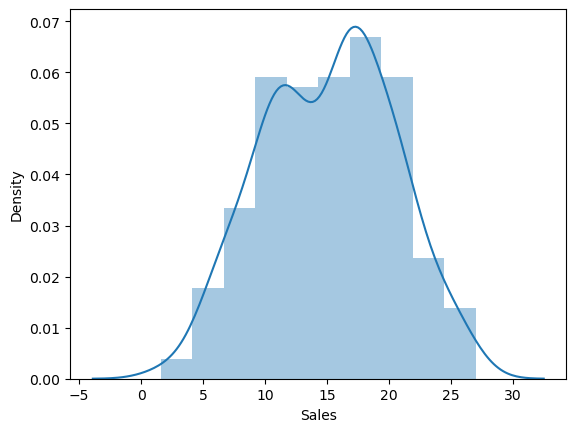

In [12]:
y.shape
 
sns.distplot(y,hist=True)
plt.show()

C:\Users\PC DOCTOR\AppData\Local\Temp\ipykernel_1644\3013418812.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_log)


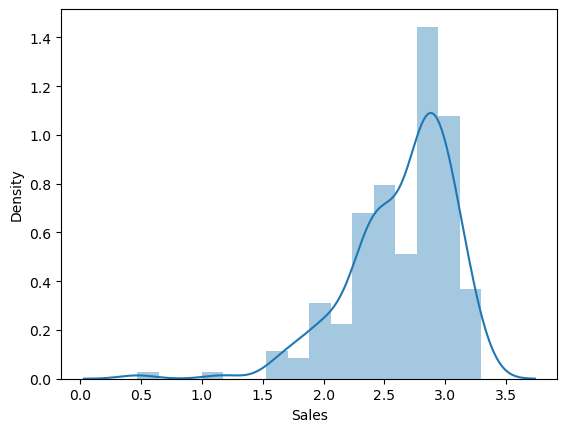

In [13]:
Y_log=np.log(y)
sns.distplot(Y_log)
plt.show()

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


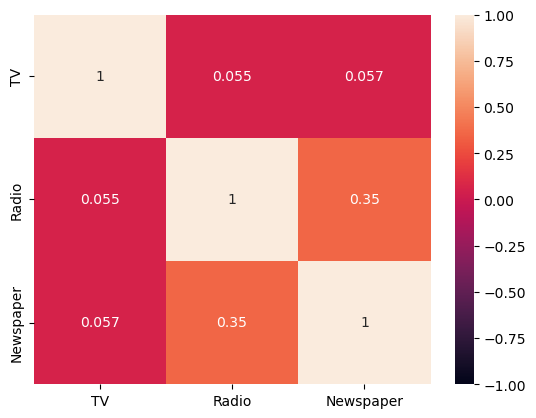

In [14]:
#Assumption of multicollinearity:There should be no multicollinearity(relationship) between the independent variables.
corr_df=x.corr(method='pearson')
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
 
#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [17]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(x_train,y_train)
 
# print intercept and coefficeint
print(lm.intercept_)
print(lm.coef_)

4.79312364494618
[ 0.05352432  0.10891759 -0.00136974]


In [18]:
#pair the feature name with coefficients
print(list(zip(x.columns,lm.coef_)))

[('TV', 0.05352432223021434), ('Radio', 0.10891758880554524), ('Newspaper', -0.0013697403326593067)]


In [19]:
y_pred=lm.predict(x_test)
print(y_pred)

[19.27102862 10.48212482 19.4267087  24.45648335 20.86340871 15.25422464
 16.81344896 20.7374558  21.14142192 10.61813631 24.8362031   8.92965564
 10.33492854 20.15938749 20.49335898 13.50252635 21.38558511  8.32591533
 21.83704273 20.65094605 17.13013995  9.13181045 23.35488529 15.05375263
 20.86139394  8.09385767 10.39839367 11.39364194 22.12834829  8.00815831
 13.7989675  21.05903052  6.41095702  6.44209421 20.78756344 19.82135121
  9.07317268 21.15584856 10.62363975 17.04930911]


In [20]:
new_df=pd.DataFrame()
new_df=x_test
 
new_df['Actual Sales']=y_test
new_df['Predicted Sales']=y_pred
new_df

,TV,Radio,Newspaper,Actual Sales,Predicted Sales
59,210.7,29.5,9.3,18.4,19.271029
5,8.7,48.9,75.0,7.2,10.482125
20,218.4,27.7,53.4,18.0,19.426709
198,283.6,42.0,66.2,25.5,24.456483
52,216.4,41.7,39.6,22.6,20.863409
19,147.3,23.9,19.1,14.6,15.254225
162,188.4,18.1,25.6,19.9,16.813449
55,198.9,49.4,60.0,23.7,20.737456
69,216.8,43.9,27.2,22.3,21.141422
2,17.2,45.9,69.3,12.0,10.618136


In [23]:
#Evaluating
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8886717577059423
RMSE: 2.10914093304191
Adj R-square: 0.8869677539973598


In [24]:
#Tuning Techniques -> Ridge Regression
#performing using ridge regression
 
from sklearn.model_selection import train_test_split
 
#split the data into  the test and train
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=10)

In [25]:
from sklearn.linear_model import Ridge
#create a model object
lm=Ridge()
#train the model object
lm.fit(x_train,y_train)
 
# print intercept and coefficeint
print(lm.intercept_)

4.793184934783632


In [26]:
#PREDICT USING THE  MODEL
y_pred=lm.predict(x_test)
print(y_pred)

[19.27098381 10.48206778 19.42670473 24.45643563 20.86334335 15.25420978
 16.81345887 20.73737915 21.14133887 10.61808538 24.83614234  8.92971283
 10.33490134 20.15935141 20.49335434 13.5024839  21.3855453   8.32587568
 21.83697709 20.65085307 17.13012641  9.13173531 23.35482673 15.05371312
 20.86142657  8.0938794  10.39832038 11.39359504 22.12826636  8.00815961
 13.79898519 21.0589733   6.41102789  6.44217505 20.78760733 19.82141398
  9.07323863 21.15586749 10.62369038 17.04936131]


In [28]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
print(lm.coef_)

R-squared: 0.8886720065753179
RMSE: 2.1091385755948266
Adj R-square: 0.8869680066759604
[ 0.05352429  0.10891397 -0.00136896]
